###   Model to Predict Anime Score
The purpose of this project is to practice skills in data analysis and machine learning.
To achieve this, I attempt to predict what an anime's MyAnimeList score will be, given certain parameters.

Scenario: As an indie company, can we predict the score our project will get?

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', 1500)

In [2]:
csv_path = "C:\\Users\\Albert\\Desktop\\Dataset\\AnimeList.csv" #https://www.kaggle.com/datasets/azathoth42/myanimelist?select=AnimeList.csv
main_df = pd.read_csv(csv_path)
df_copy = main_df
df_copy.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


# Data Cleaning

Drop unneeded columns

In [3]:
df_copy.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [4]:
drop_cols = ['title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'status',
       'airing', 'aired_string', 'aired','duration', 'rating',  'background',
       'premiered', 'broadcast', 'related',  'opening_theme', 'ending_theme']

In [5]:
# drop unneeded columns
df_cleanned = df_copy.drop(columns = drop_cols, inplace=False, axis=1)
df_cleanned.head()


,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre
0,11013,Inu x Boku SS,TV,Manga,12,7.63,139250,1274.0,231,283882,2809,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,Manga,26,7.89,91206,727.0,366,204003,2579,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,Manga,51,7.55,37129,1508.0,1173,70127,802,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,Original,38,8.21,36501,307.0,916,93312,3344,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,Manga,25,8.67,107767,50.0,426,182765,2082,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen"


In [6]:
df_cleanned = df_cleanned[df_cleanned.score > 0] 

In [7]:
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    14124 non-null  int64  
 1   title       14124 non-null  object 
 2   type        14124 non-null  object 
 3   source      14124 non-null  object 
 4   episodes    14124 non-null  int64  
 5   score       14124 non-null  float64
 6   scored_by   14124 non-null  int64  
 7   rank        12880 non-null  float64
 8   popularity  14124 non-null  int64  
 9   members     14124 non-null  int64  
 10  favorites   14124 non-null  int64  
 11  producer    8221 non-null   object 
 12  licensor    3359 non-null   object 
 13  studio      8381 non-null   object 
 14  genre       14068 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.7+ MB


Matching data types and filling in nulls

In [8]:
#Fill in null rank column with zeros
df_cleanned['rank'] = df_cleanned['rank'].fillna(0)
#Fill in rest of null values with 'unknown'
df_cleanned.fillna('unknown', inplace=True)
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    14124 non-null  int64  
 1   title       14124 non-null  object 
 2   type        14124 non-null  object 
 3   source      14124 non-null  object 
 4   episodes    14124 non-null  int64  
 5   score       14124 non-null  float64
 6   scored_by   14124 non-null  int64  
 7   rank        14124 non-null  float64
 8   popularity  14124 non-null  int64  
 9   members     14124 non-null  int64  
 10  favorites   14124 non-null  int64  
 11  producer    14124 non-null  object 
 12  licensor    14124 non-null  object 
 13  studio      14124 non-null  object 
 14  genre       14124 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.7+ MB


In [9]:
#change col:rank to int 
df_cleanned['rank'] = df_cleanned['rank'].astype('int64')
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    14124 non-null  int64  
 1   title       14124 non-null  object 
 2   type        14124 non-null  object 
 3   source      14124 non-null  object 
 4   episodes    14124 non-null  int64  
 5   score       14124 non-null  float64
 6   scored_by   14124 non-null  int64  
 7   rank        14124 non-null  int64  
 8   popularity  14124 non-null  int64  
 9   members     14124 non-null  int64  
 10  favorites   14124 non-null  int64  
 11  producer    14124 non-null  object 
 12  licensor    14124 non-null  object 
 13  studio      14124 non-null  object 
 14  genre       14124 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 1.7+ MB


In [10]:
#Change text to uppercase
df_cleanned['type'] = df_cleanned['type'].str.upper()
df_cleanned['source'] = df_cleanned['source'].str.upper()
df_cleanned['producer'] = df_cleanned['producer'].str.upper()
df_cleanned['licensor'] = df_cleanned['licensor'].str.upper()
df_cleanned['studio'] = df_cleanned['studio'].str.upper()
df_cleanned['genre'] = df_cleanned['genre'].str.upper()

df_cleanned.head()

,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre
0,11013,Inu x Boku SS,TV,MANGA,12,7.63,139250,1274,231,283882,2809,"ANIPLEX, SQUARE ENIX, MAINICHI BROADCASTING SY...",SENTAI FILMWORKS,DAVID PRODUCTION,"COMEDY, SUPERNATURAL, ROMANCE, SHOUNEN"
1,2104,Seto no Hanayome,TV,MANGA,26,7.89,91206,727,366,204003,2579,"TV TOKYO, AIC, SQUARE ENIX, SOTSU",FUNIMATION,GONZO,"COMEDY, PARODY, ROMANCE, SCHOOL, SHOUNEN"
2,5262,Shugo Chara!! Doki,TV,MANGA,51,7.55,37129,1508,1173,70127,802,"TV TOKYO, SOTSU",UNKNOWN,SATELIGHT,"COMEDY, MAGIC, SCHOOL, SHOUJO"
3,721,Princess Tutu,TV,ORIGINAL,38,8.21,36501,307,916,93312,3344,"MEMORY-TECH, GANSIS, MARVELOUS AQL",ADV FILMS,HAL FILM MAKER,"COMEDY, DRAMA, MAGIC, ROMANCE, FANTASY"
4,12365,Bakuman. 3rd Season,TV,MANGA,25,8.67,107767,50,426,182765,2082,"NHK, SHUEISHA",UNKNOWN,J.C.STAFF,"COMEDY, DRAMA, ROMANCE, SHOUNEN"


### Export to csv for Tableau visualization

In [11]:
#df_cleanned.to_csv('AnimeListClean.csv', index = False)

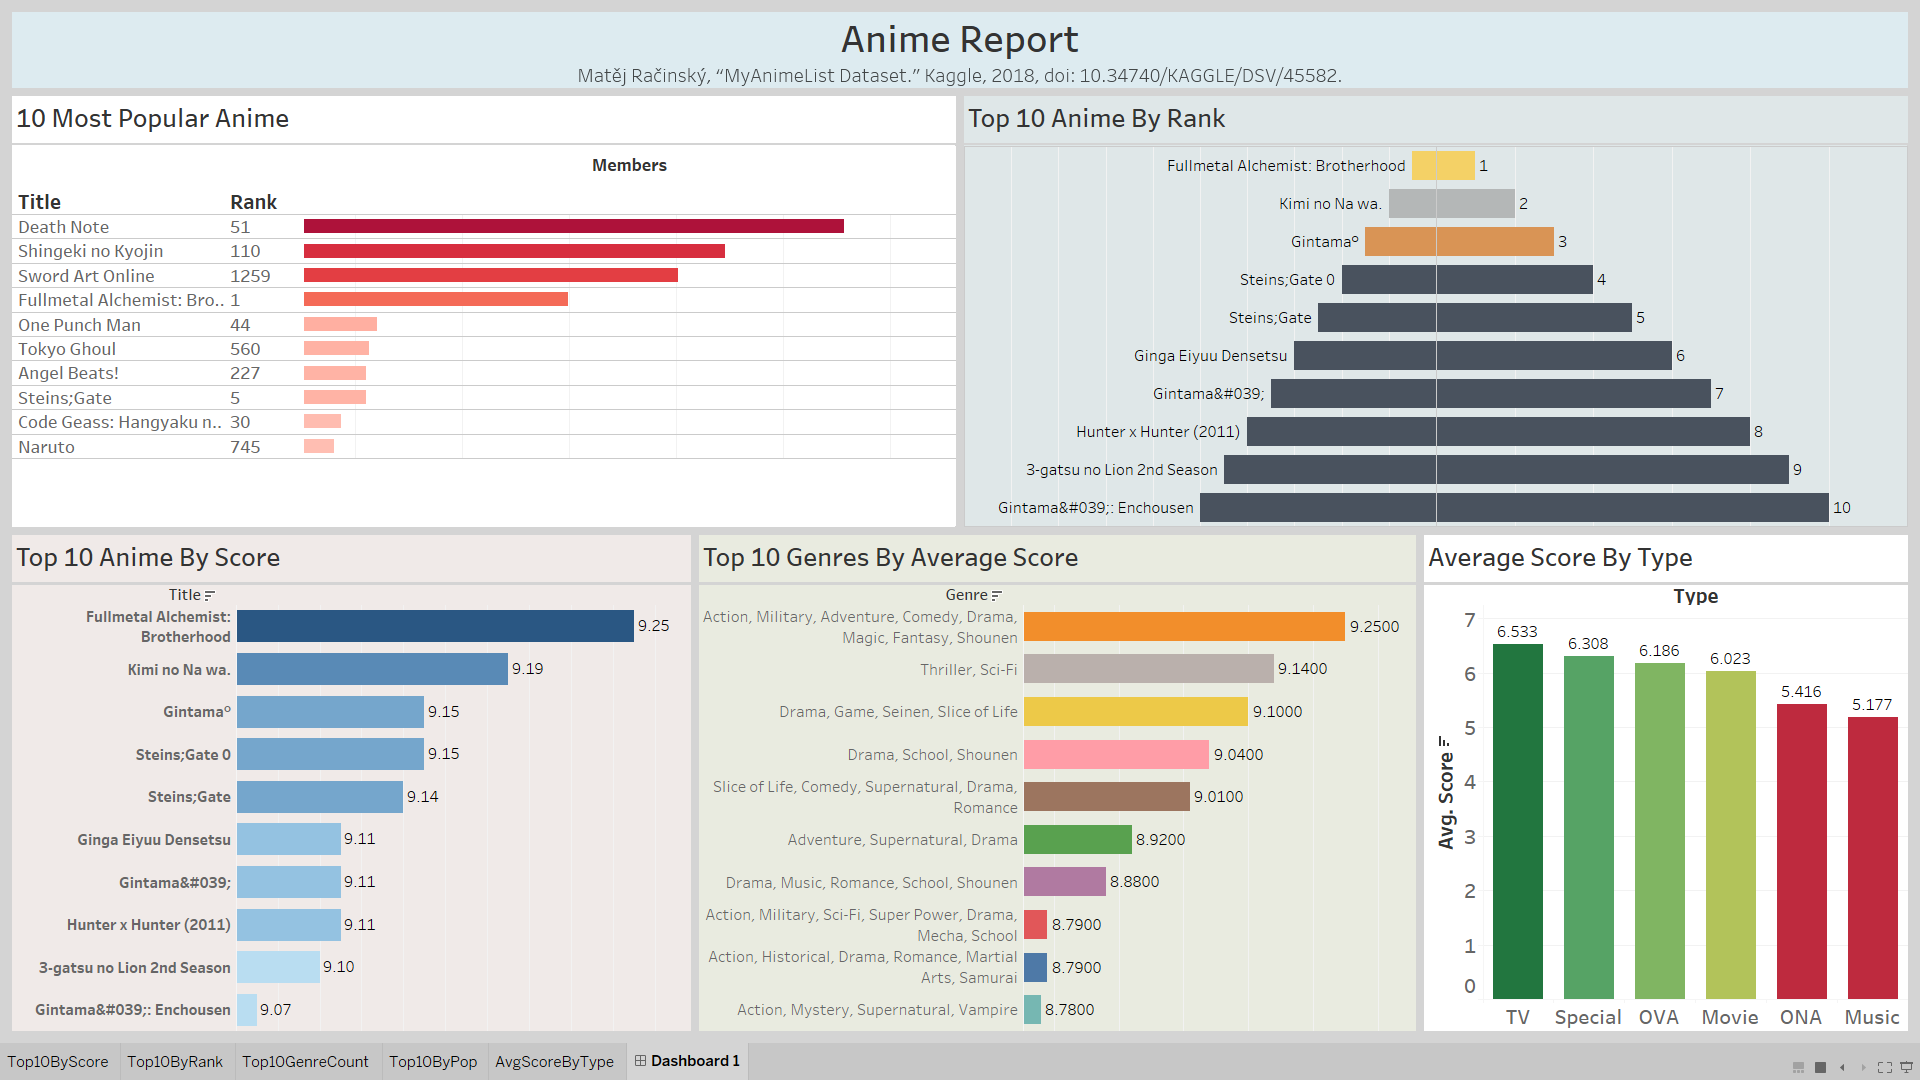

### Data Manipulation

Plot variables against each for possible correlations

In [12]:
df_cleanned.corr()
#sns.pairplot(df_cleanned)


,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
anime_id,1.000000,-0.089377,-0.338942,-0.072865,0.420038,0.391963,-0.069170,-0.054865
episodes,-0.089377,1.000000,0.091822,0.057017,-0.024651,-0.032467,0.065239,0.075076
score,-0.338942,0.091822,1.000000,0.344992,-0.691100,-0.712294,0.379608,0.206265
scored_by,-0.072865,0.057017,0.344992,1.000000,-0.289712,-0.409224,0.987478,0.792159
rank,0.420038,-0.024651,-0.691100,-0.289712,1.000000,0.785807,-0.320730,-0.157354
popularity,0.391963,-0.032467,-0.712294,-0.409224,0.785807,1.000000,-0.457470,-0.197549
members,-0.069170,0.065239,0.379608,0.987478,-0.320730,-0.457470,1.000000,0.776618
favorites,-0.054865,0.075076,0.206265,0.792159,-0.157354,-0.197549,0.776618,1.000000


Change type and source into numbers (encoding)

In [13]:
type_dummy = pd.get_dummies(df_cleanned['type'], prefix='t')
src_dummy = pd.get_dummies(df_cleanned['source'], prefix='src')

In [14]:
src_dummy.head()


,src_4-KOMA MANGA,src_BOOK,src_CARD GAME,src_DIGITAL MANGA,src_GAME,src_LIGHT NOVEL,src_MANGA,src_MUSIC,src_NOVEL,src_ORIGINAL,src_OTHER,src_PICTURE BOOK,src_RADIO,src_UNKNOWN,src_VISUAL NOVEL,src_WEB MANGA
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Add into df

In [15]:
df_cleanned = pd.concat([df_cleanned, type_dummy, src_dummy], axis=1)
df_cleanned.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'producer', 'licensor',
       'studio', 'genre', 't_MOVIE', 't_MUSIC', 't_ONA', 't_OVA', 't_SPECIAL',
       't_TV', 'src_4-KOMA MANGA', 'src_BOOK', 'src_CARD GAME',
       'src_DIGITAL MANGA', 'src_GAME', 'src_LIGHT NOVEL', 'src_MANGA',
       'src_MUSIC', 'src_NOVEL', 'src_ORIGINAL', 'src_OTHER',
       'src_PICTURE BOOK', 'src_RADIO', 'src_UNKNOWN', 'src_VISUAL NOVEL',
       'src_WEB MANGA'],
      dtype='object')

In [16]:
df_cleanned.head()

,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre,t_MOVIE,t_MUSIC,t_ONA,t_OVA,t_SPECIAL,t_TV,src_4-KOMA MANGA,src_BOOK,src_CARD GAME,src_DIGITAL MANGA,src_GAME,src_LIGHT NOVEL,src_MANGA,src_MUSIC,src_NOVEL,src_ORIGINAL,src_OTHER,src_PICTURE BOOK,src_RADIO,src_UNKNOWN,src_VISUAL NOVEL,src_WEB MANGA
0,11013,Inu x Boku SS,TV,MANGA,12,7.63,139250,1274,231,283882,2809,"ANIPLEX, SQUARE ENIX, MAINICHI BROADCASTING SY...",SENTAI FILMWORKS,DAVID PRODUCTION,"COMEDY, SUPERNATURAL, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,MANGA,26,7.89,91206,727,366,204003,2579,"TV TOKYO, AIC, SQUARE ENIX, SOTSU",FUNIMATION,GONZO,"COMEDY, PARODY, ROMANCE, SCHOOL, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,MANGA,51,7.55,37129,1508,1173,70127,802,"TV TOKYO, SOTSU",UNKNOWN,SATELIGHT,"COMEDY, MAGIC, SCHOOL, SHOUJO",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,ORIGINAL,38,8.21,36501,307,916,93312,3344,"MEMORY-TECH, GANSIS, MARVELOUS AQL",ADV FILMS,HAL FILM MAKER,"COMEDY, DRAMA, MAGIC, ROMANCE, FANTASY",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,MANGA,25,8.67,107767,50,426,182765,2082,"NHK, SHUEISHA",UNKNOWN,J.C.STAFF,"COMEDY, DRAMA, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Select feature(X) and dependant variable (y)

In [17]:
y = df_cleanned[['score']]
X = df_cleanned.drop(['anime_id','title','type','source','episodes','score','scored_by','rank','popularity','members','favorites','producer','licensor','studio','genre'], axis=1)

In [18]:
print(y.info())
print(X.info())
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   14124 non-null  float64
dtypes: float64(1)
memory usage: 220.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   t_MOVIE            14124 non-null  uint8
 1   t_MUSIC            14124 non-null  uint8
 2   t_ONA              14124 non-null  uint8
 3   t_OVA              14124 non-null  uint8
 4   t_SPECIAL          14124 non-null  uint8
 5   t_TV               14124 non-null  uint8
 6   src_4-KOMA MANGA   14124 non-null  uint8
 7   src_BOOK           14124 non-null  uint8
 8   src_CARD GAME      14124 non-null  uint8
 9   src_DIGITAL MANGA  14124 non-null  uint8
 10  src_GAME           14124 non-null  uint8
 11  src_LIGHT NOVEL    141

Split data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11299 entries, 12382 to 13309
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   t_MOVIE            11299 non-null  uint8
 1   t_MUSIC            11299 non-null  uint8
 2   t_ONA              11299 non-null  uint8
 3   t_OVA              11299 non-null  uint8
 4   t_SPECIAL          11299 non-null  uint8
 5   t_TV               11299 non-null  uint8
 6   src_4-KOMA MANGA   11299 non-null  uint8
 7   src_BOOK           11299 non-null  uint8
 8   src_CARD GAME      11299 non-null  uint8
 9   src_DIGITAL MANGA  11299 non-null  uint8
 10  src_GAME           11299 non-null  uint8
 11  src_LIGHT NOVEL    11299 non-null  uint8
 12  src_MANGA          11299 non-null  uint8
 13  src_MUSIC          11299 non-null  uint8
 14  src_NOVEL          11299 non-null  uint8
 15  src_ORIGINAL       11299 non-null  uint8
 16  src_OTHER          11299 non-null  uint8
 17  src_PICT

Train LR model.

In [21]:
lr_model = LinearRegression().fit(X_train, y_train)

In [22]:
lr_model.score(X_train, y_train)

0.2855234098284536

In [23]:
print("Intercept of the linear equation:", lr_model.intercept_) 
print("\nCOefficients of the equation are:", lr_model.coef_)


Intercept of the linear equation: [1.45314196e+11]

COefficients of the equation are: [[ 6.29410132e+10  6.29410132e+10  6.29410132e+10  6.29410132e+10
   6.29410132e+10  6.29410132e+10 -2.08255209e+11 -2.08255209e+11
  -2.08255209e+11 -2.08255209e+11 -2.08255209e+11 -2.08255209e+11
  -2.08255209e+11 -2.08255209e+11 -2.08255209e+11 -2.08255209e+11
  -2.08255209e+11 -2.08255209e+11 -2.08255209e+11 -2.08255209e+11
  -2.08255209e+11 -2.08255209e+11]]


Test model

In [24]:
yhat = pd.DataFrame(lr_model.predict(X_test), columns=['Predicted Score'])
yhat.head()


,Predicted Score
0,6.919525
1,7.124023
2,6.315582
3,6.504272
4,6.458466


In [25]:
actualScore = y_test.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualScore,yhat],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,

Scoring the performance of model

In [26]:
#define scoring function
def score_model(y_test, yhat):
    #closer to zero is better
    print('MAE: ', metrics.mean_absolute_error(y_test, yhat))

    # Closer to zero is better
    print('MSE: ', metrics.mean_squared_error(y_test, yhat))

    # Closer to zero is better
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

    # Closer to one is better
    print('R^2: ', metrics.r2_score(y_test,yhat))

In [27]:
score_model(y_test, yhat)

MAE:  0.7151924333690542
MSE:  0.873469076710097
RMSE:  0.9345956755250353
R^2:  0.2704976411222292


In [28]:
#plotting the true value vs the predicted value
def plot_test(xtest, yframe):
    for columns in X_test:
        sns.scatterplot(x=X_test[columns], y=yframe['score'] )
        sns.scatterplot(x=X_test[columns]+.05, y=yframe['Predicted Score'] ) # +0.5 Shifts the predicted value to the right for better visual
        plt.legend(['actual','predicted'], loc="lower center")
        plt.title(columns)
        plt.show()

#plot_test(X_test, df_actual_vs_predicted)



Use polynomial features

In [29]:
from sklearn.preprocessing import PolynomialFeatures


In [30]:
poly = PolynomialFeatures(1)

In [31]:
X_poly = poly.fit_transform(X)

In [32]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly,y,test_size=0.2)

In [33]:
poly_model = LinearRegression().fit(Xp_train, yp_train)
poly_model.score(Xp_train, yp_train)


0.27854617445027785

In [34]:
yp_hat = pd.DataFrame(poly_model.predict(Xp_test), columns=['Predicted Score'])
yp_hat.head()


,Predicted Score
0,5.998215
1,5.917465
2,6.788681
3,5.111801
4,6.042587


In [35]:
p_actualScore = yp_test.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
dfp_actual_vs_predicted = pd.concat([p_actualScore,yp_hat],axis =1)
dfp_actual_vs_predicted.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,

In [36]:
score_model(yp_test, yp_hat)


MAE:  0.7252275353895881
MSE:  0.8750754626548747
RMSE:  0.9354546823095572
R^2:  0.29858105145159564


In [37]:
#plot_test(Xp_test, dfp_actual_vs_predicted)

Can we use Genre, Producer, etc to predict the score?

In [38]:
df_cleanned.head()

,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre,t_MOVIE,t_MUSIC,t_ONA,t_OVA,t_SPECIAL,t_TV,src_4-KOMA MANGA,src_BOOK,src_CARD GAME,src_DIGITAL MANGA,src_GAME,src_LIGHT NOVEL,src_MANGA,src_MUSIC,src_NOVEL,src_ORIGINAL,src_OTHER,src_PICTURE BOOK,src_RADIO,src_UNKNOWN,src_VISUAL NOVEL,src_WEB MANGA
0,11013,Inu x Boku SS,TV,MANGA,12,7.63,139250,1274,231,283882,2809,"ANIPLEX, SQUARE ENIX, MAINICHI BROADCASTING SY...",SENTAI FILMWORKS,DAVID PRODUCTION,"COMEDY, SUPERNATURAL, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,MANGA,26,7.89,91206,727,366,204003,2579,"TV TOKYO, AIC, SQUARE ENIX, SOTSU",FUNIMATION,GONZO,"COMEDY, PARODY, ROMANCE, SCHOOL, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,MANGA,51,7.55,37129,1508,1173,70127,802,"TV TOKYO, SOTSU",UNKNOWN,SATELIGHT,"COMEDY, MAGIC, SCHOOL, SHOUJO",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,ORIGINAL,38,8.21,36501,307,916,93312,3344,"MEMORY-TECH, GANSIS, MARVELOUS AQL",ADV FILMS,HAL FILM MAKER,"COMEDY, DRAMA, MAGIC, ROMANCE, FANTASY",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,MANGA,25,8.67,107767,50,426,182765,2082,"NHK, SHUEISHA",UNKNOWN,J.C.STAFF,"COMEDY, DRAMA, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
#build a set of genre, this removes duplicates
def get_vals(colname, df=df_cleanned):
    elements = set()
    for name, value in df[colname].iteritems():
        value = value.split(', ')
        elements.update(value)
    return elements
    
   


In [40]:
genres = get_vals('genre')
#print(genres)
producers, licensors, studios = get_vals('producer'), get_vals('licensor'), get_vals('studio')	
#print(producers)
#print(licensors)
#print(studios)



In [41]:
#function to add genres as columns
def add_cols(list, prefix, df=df_cleanned):
    for i in list:
        df[prefix + '_' + i] = 0 #fills column cells with zeros
        df[prefix + '_' + i] = df[prefix + '_' + i].astype('uint8')
    print("Columns added.")



In [42]:
add_cols(genres,'g')
df_cleanned.head()


Columns added.


,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre,t_MOVIE,t_MUSIC,t_ONA,t_OVA,t_SPECIAL,t_TV,src_4-KOMA MANGA,src_BOOK,src_CARD GAME,src_DIGITAL MANGA,src_GAME,src_LIGHT NOVEL,src_MANGA,src_MUSIC,src_NOVEL,src_ORIGINAL,src_OTHER,src_PICTURE BOOK,src_RADIO,src_UNKNOWN,src_VISUAL NOVEL,src_WEB MANGA,g_MARTIAL ARTS,g_SPACE,g_SHOUJO AI,g_MAGIC,g_KIDS,g_YURI,g_DRAMA,g_ROMANCE,g_SHOUNEN AI,g_PSYCHOLOGICAL,g_MECHA,g_FANTASY,g_SAMURAI,g_ACTION,g_HORROR,g_UNKNOWN,g_POLICE,g_HAREM,g_ADVENTURE,g_SHOUNEN,g_SUPERNATURAL,g_GAME,g_SEINEN,g_HISTORICAL,g_HENTAI,g_MUSIC,g_SUPER POWER,g_ECCHI,g_VAMPIRE,g_SPORTS,g_THRILLER,g_DEMONS,g_SCHOOL,g_SHOUJO,g_MYSTERY,g_PARODY,g_COMEDY,g_MILITARY,g_DEMENTIA,g_CARS,g_SLICE OF LIFE,g_YAOI,g_SCI-FI,g_JOSEI
0,11013,Inu x Boku SS,TV,MANGA,12,7.63,139250,1274,231,283882,2809,"ANIPLEX, SQUARE ENIX, MAINICHI BROADCASTING SY...",SENTAI FILMWORKS,DAVID PRODUCTION,"COMEDY, SUPERNATURAL, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,MANGA,26,7.89,91206,727,366,204003,2579,"TV TOKYO, AIC, SQUARE ENIX, SOTSU",FUNIMATION,GONZO,"COMEDY, PARODY, ROMANCE, SCHOOL, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,MANGA,51,7.55,37129,1508,1173,70127,802,"TV TOKYO, SOTSU",UNKNOWN,SATELIGHT,"COMEDY, MAGIC, SCHOOL, SHOUJO",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,ORIGINAL,38,8.21,36501,307,916,93312,3344,"MEMORY-TECH, GANSIS, MARVELOUS AQL",ADV FILMS,HAL FILM MAKER,"COMEDY, DRAMA, MAGIC, ROMANCE, FANTASY",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,MANGA,25,8.67,107767,50,426,182765,2082,"NHK, SHUEISHA",UNKNOWN,J.C.STAFF,"COMEDY, DRAMA, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#function to set value to 1 if anime is of the genre
def set_val(column, prefix, df=df_cleanned):
    for i, value in df[column].iteritems():
        value = value.split(', ')
        for h in value:
            df.loc[i, prefix + '_' + h] = 1
    print("Values set.")


In [44]:

set_val('genre','g')
df_cleanned.head()


Values set.


,anime_id,title,type,source,episodes,score,scored_by,rank,popularity,members,favorites,producer,licensor,studio,genre,t_MOVIE,t_MUSIC,t_ONA,t_OVA,t_SPECIAL,t_TV,src_4-KOMA MANGA,src_BOOK,src_CARD GAME,src_DIGITAL MANGA,src_GAME,src_LIGHT NOVEL,src_MANGA,src_MUSIC,src_NOVEL,src_ORIGINAL,src_OTHER,src_PICTURE BOOK,src_RADIO,src_UNKNOWN,src_VISUAL NOVEL,src_WEB MANGA,g_MARTIAL ARTS,g_SPACE,g_SHOUJO AI,g_MAGIC,g_KIDS,g_YURI,g_DRAMA,g_ROMANCE,g_SHOUNEN AI,g_PSYCHOLOGICAL,g_MECHA,g_FANTASY,g_SAMURAI,g_ACTION,g_HORROR,g_UNKNOWN,g_POLICE,g_HAREM,g_ADVENTURE,g_SHOUNEN,g_SUPERNATURAL,g_GAME,g_SEINEN,g_HISTORICAL,g_HENTAI,g_MUSIC,g_SUPER POWER,g_ECCHI,g_VAMPIRE,g_SPORTS,g_THRILLER,g_DEMONS,g_SCHOOL,g_SHOUJO,g_MYSTERY,g_PARODY,g_COMEDY,g_MILITARY,g_DEMENTIA,g_CARS,g_SLICE OF LIFE,g_YAOI,g_SCI-FI,g_JOSEI
0,11013,Inu x Boku SS,TV,MANGA,12,7.63,139250,1274,231,283882,2809,"ANIPLEX, SQUARE ENIX, MAINICHI BROADCASTING SY...",SENTAI FILMWORKS,DAVID PRODUCTION,"COMEDY, SUPERNATURAL, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,MANGA,26,7.89,91206,727,366,204003,2579,"TV TOKYO, AIC, SQUARE ENIX, SOTSU",FUNIMATION,GONZO,"COMEDY, PARODY, ROMANCE, SCHOOL, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,MANGA,51,7.55,37129,1508,1173,70127,802,"TV TOKYO, SOTSU",UNKNOWN,SATELIGHT,"COMEDY, MAGIC, SCHOOL, SHOUJO",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,ORIGINAL,38,8.21,36501,307,916,93312,3344,"MEMORY-TECH, GANSIS, MARVELOUS AQL",ADV FILMS,HAL FILM MAKER,"COMEDY, DRAMA, MAGIC, ROMANCE, FANTASY",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,MANGA,25,8.67,107767,50,426,182765,2082,"NHK, SHUEISHA",UNKNOWN,J.C.STAFF,"COMEDY, DRAMA, ROMANCE, SHOUNEN",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
#df_cleanned.info()

In [46]:
y_genre = df_cleanned[['score']]
X_genre = df_cleanned.drop(['anime_id', 'title', 'type', 'source', 'episodes', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'producer', 'licensor',
       'studio', 'genre', 't_MOVIE', 't_MUSIC', 't_ONA', 't_OVA', 't_SPECIAL',
       't_TV', 'src_4-KOMA MANGA', 'src_BOOK', 'src_CARD GAME',
       'src_DIGITAL MANGA', 'src_GAME', 'src_LIGHT NOVEL', 'src_MANGA',
       'src_MUSIC', 'src_NOVEL', 'src_ORIGINAL', 'src_OTHER',
       'src_PICTURE BOOK', 'src_RADIO', 'src_UNKNOWN', 'src_VISUAL NOVEL',
       'src_WEB MANGA'], axis=1)


In [47]:
# split into train/test
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_genre,y_genre, test_size=0.2)

In [48]:
#train lr model
lr_model2 = LinearRegression().fit(Xg_train,yg_train)

In [49]:
lr_model2.score(Xg_train,yg_train)


0.3219939250218443

In [50]:
print("Intercept of the linear equation:", lr_model2.intercept_) 
print("\nCOefficients of the equation are:", lr_model2.coef_)


Intercept of the linear equation: [5.64152048]

COefficients of the equation are: [[ 0.08623454  0.07602068  0.29191881  0.16661687 -0.25081958 -0.21059524
   0.46224867  0.3334552   0.29668129  0.44961503  0.05894989  0.30309585
   0.08326449  0.26415962 -0.31704931 -0.51854176  0.32990927  0.19199098
   0.2267949   0.50718219  0.34886995  0.14472593  0.48267935  0.25636062
   0.43092936 -0.31670351  0.19830972 -0.00648081  0.1582285   0.38558269
   0.29156817 -0.10139371  0.41580141  0.38059687  0.58178545 -0.04197761
   0.24502949  0.38332256 -0.83929992 -0.21764547  0.33901908  0.02634345
   0.18272645  0.5782584 ]]


In [51]:
yg_hat = pd.DataFrame(lr_model2.predict(Xg_test), columns=['Predicted Score'])
yg_hat.head()


,Predicted Score
0,5.886550
1,6.486642
2,6.349782
3,6.111233
4,5.796296


In [52]:

actualScore2 = yg_test.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted2 = pd.concat([actualScore2,yg_hat],axis =1)
df_actual_vs_predicted2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,

In [53]:
score_model(yg_test,yg_hat)

MAE:  0.7025138100578413
MSE:  0.8203337008142381
RMSE:  0.9057227505226078
R^2:  0.3217530747595998


Feature Selection

In [54]:
df_cleanned.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'producer', 'licensor',
       'studio', 'genre', 't_MOVIE', 't_MUSIC', 't_ONA', 't_OVA', 't_SPECIAL',
       't_TV', 'src_4-KOMA MANGA', 'src_BOOK', 'src_CARD GAME',
       'src_DIGITAL MANGA', 'src_GAME', 'src_LIGHT NOVEL', 'src_MANGA',
       'src_MUSIC', 'src_NOVEL', 'src_ORIGINAL', 'src_OTHER',
       'src_PICTURE BOOK', 'src_RADIO', 'src_UNKNOWN', 'src_VISUAL NOVEL',
       'src_WEB MANGA', 'g_MARTIAL ARTS', 'g_SPACE', 'g_SHOUJO AI', 'g_MAGIC',
       'g_KIDS', 'g_YURI', 'g_DRAMA', 'g_ROMANCE', 'g_SHOUNEN AI',
       'g_PSYCHOLOGICAL', 'g_MECHA', 'g_FANTASY', 'g_SAMURAI', 'g_ACTION',
       'g_HORROR', 'g_UNKNOWN', 'g_POLICE', 'g_HAREM', 'g_ADVENTURE',
       'g_SHOUNEN', 'g_SUPERNATURAL', 'g_GAME', 'g_SEINEN', 'g_HISTORICAL',
       'g_HENTAI', 'g_MUSIC', 'g_SUPER POWER', 'g_ECCHI', 'g_VAMPIRE',
       'g_SPORTS', 'g_THRILLER', 'g_DEMONS', 'g_SCHOO

In [55]:
add_cols(producers,'p')
add_cols(licensors,'l')
add_cols(studios,'st')
set_val('producer','p')
set_val('licensor','l')
set_val('studio','st')


C:\Users\Albert\AppData\Local\Temp/ipykernel_12404/535737258.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[prefix + '_' + i] = 0 #fills column cells with zeros


Columns added.
Columns added.
Columns added.
Values set.
Values set.
Values set.


In [56]:
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Columns: 1755 entries, anime_id to st_DAI NIPPON PRINTING
dtypes: float64(1), int64(7), object(7), uint8(1740)
memory usage: 25.7+ MB


In [57]:
y_all = df_cleanned['score']
X_all = df_cleanned.drop(['anime_id', 'title', 'type', 'source', 'episodes', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'producer', 'licensor',
       'studio', 'genre'], axis=1)

In [58]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14124 entries, 0 to 14477
Columns: 1740 entries, t_MOVIE to st_DAI NIPPON PRINTING
dtypes: uint8(1740)
memory usage: 24.0 MB


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 


In [60]:
#extracting top 10 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=mutual_info_regression, k=10)
fit = bestfeatures.fit(X_all,y_all)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_all.columns)
 
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [61]:
topFeatures = featureScores.nlargest(50,'Score')  #printing 10 best features
topFeatures.T

,1655,1194,12,5,19,41,1,26,1189,998,47,28,15,11,35,736,60,29,1214,2,54,40,336,20,359,1176,13,344,56,1182,3,1373,981,609,65,58,279,177,269,842,1197,182,215,199,46,431,1363,1700,949,439
Specs,st_UNKNOWN,l_UNKNOWN,src_MANGA,t_TV,src_UNKNOWN,g_SHOUNEN,t_MUSIC,g_KIDS,l_FUNIMATION,p_UNKNOWN,g_MUSIC,g_DRAMA,src_ORIGINAL,src_LIGHT NOVEL,g_ACTION,p_NHK,g_DEMENTIA,g_ROMANCE,l_SENTAI FILMWORKS,t_ONA,g_SCHOOL,g_ADVENTURE,p_ANIPLEX,src_VISUAL NOVEL,p_BANDAI VISUAL,l_BANDAI ENTERTAINMENT,src_MUSIC,p_CHINA ANIMATION CHARACTERS,g_MYSTERY,l_ANIPLEX OF AMERICA,t_OVA,st_STUDIO DEEN,p_PORO,p_NBCUNIVERSAL ENTERTAINMENT JAPAN,g_JOSEI,g_COMEDY,p_SHUEISHA,p_ACTAS,p_KAKAO JAPAN,p_STEVE N&#039; STEVEN,l_VIZ MEDIA,p_ORCHID SEED,p_SME VISUAL WORKS,p_APOLLON,g_HENTAI,p_ZACK PROMOTION,st_TOHO ANIMATION,st_SBS TV PRODUCTION,p_CHIPPAI,p_BANDAI NAMCO GAMES
Score,0.155506,0.097066,0.068921,0.048916,0.046204,0.038426,0.038189,0.03672,0.035997,0.033378,0.030717,0.02491,0.024321,0.023892,0.022798,0.020464,0.02035,0.019395,0.018449,0.018095,0.017735,0.017587,0.017206,0.017132,0.016345,0.015633,0.015589,0.014946,0.014672,0.014654,0.014384,0.014129,0.013589,0.013334,0.013109,0.012793,0.012752,0.012526,0.012164,0.011945,0.01173,0.011705,0.01155,0.0113,0.011262,0.011119,0.011055,0.010857,0.010857,0.01081


In [62]:
topFeatures['Specs'].values

array(['st_UNKNOWN', 'l_UNKNOWN', 'src_MANGA', 't_TV', 'src_UNKNOWN',
       'g_SHOUNEN', 't_MUSIC', 'g_KIDS', 'l_FUNIMATION', 'p_UNKNOWN',
       'g_MUSIC', 'g_DRAMA', 'src_ORIGINAL', 'src_LIGHT NOVEL',
       'g_ACTION', 'p_NHK', 'g_DEMENTIA', 'g_ROMANCE',
       'l_SENTAI FILMWORKS', 't_ONA', 'g_SCHOOL', 'g_ADVENTURE',
       'p_ANIPLEX', 'src_VISUAL NOVEL', 'p_BANDAI VISUAL',
       'l_BANDAI ENTERTAINMENT', 'src_MUSIC',
       'p_CHINA ANIMATION CHARACTERS', 'g_MYSTERY',
       'l_ANIPLEX OF AMERICA', 't_OVA', 'st_STUDIO DEEN', 'p_PORO',
       'p_NBCUNIVERSAL ENTERTAINMENT JAPAN', 'g_JOSEI', 'g_COMEDY',
       'p_SHUEISHA', 'p_ACTAS', 'p_KAKAO JAPAN', 'p_STEVE N&#039; STEVEN',
       'l_VIZ MEDIA', 'p_ORCHID SEED', 'p_SME VISUAL WORKS', 'p_APOLLON',
       'g_HENTAI', 'p_ZACK PROMOTION', 'st_TOHO ANIMATION',
       'st_SBS TV PRODUCTION', 'p_CHIPPAI', 'p_BANDAI NAMCO GAMES'],
      dtype=object)

In [63]:
y_final = df_cleanned[['score']]
X_final = df_cleanned[topFeatures['Specs'].values]
X_final.head()

,st_UNKNOWN,l_UNKNOWN,src_MANGA,t_TV,src_UNKNOWN,g_SHOUNEN,t_MUSIC,g_KIDS,l_FUNIMATION,p_UNKNOWN,g_MUSIC,g_DRAMA,src_ORIGINAL,src_LIGHT NOVEL,g_ACTION,p_NHK,g_DEMENTIA,g_ROMANCE,l_SENTAI FILMWORKS,t_ONA,g_SCHOOL,g_ADVENTURE,p_ANIPLEX,src_VISUAL NOVEL,p_BANDAI VISUAL,l_BANDAI ENTERTAINMENT,src_MUSIC,p_CHINA ANIMATION CHARACTERS,g_MYSTERY,l_ANIPLEX OF AMERICA,t_OVA,st_STUDIO DEEN,p_PORO,p_NBCUNIVERSAL ENTERTAINMENT JAPAN,g_JOSEI,g_COMEDY,p_SHUEISHA,p_ACTAS,p_KAKAO JAPAN,p_STEVE N&#039; STEVEN,l_VIZ MEDIA,p_ORCHID SEED,p_SME VISUAL WORKS,p_APOLLON,g_HENTAI,p_ZACK PROMOTION,st_TOHO ANIMATION,st_SBS TV PRODUCTION,p_CHIPPAI,p_BANDAI NAMCO GAMES
0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_final, y_final, test_size=0.2)

In [65]:
lr_model3 = LinearRegression().fit(Xf_train, yf_train)
yf_hat = pd.DataFrame(lr_model3.predict(Xf_test), columns=['Predicted Score'])
score_model(yf_test, yf_hat)

MAE:  0.621076118098887
MSE:  0.6521096293686989
RMSE:  0.8075330515642681
R^2:  0.47340330232394057


In [66]:
actualScore3 = yf_test.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted3 = pd.concat([actualScore3,yf_hat],axis =1)
df_actual_vs_predicted3.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,

## Conclusion
Given the available parameters, we cannot accurately predict the score of an Anime with enough confidence that it is not by random chance.

__Reasons:__
- Score given to an anime by a watcher is very subjective.
- Data does not capture the necessary features to predict score with high level of confidence.

__Other Observations:__
- Going in, I thought genre and studio would be a strong feature to predict the score. This is because I usually stick to the same genre of anime.